In [ ]:
# Step 1: Install Required Libraries
!pip install tensorflow
!pip install matplotlib
!pip install pillow

In [ ]:
# Step 1: Install Required Libraries
!pip install torch torchvision transformers pillow

# Step 2: Import Libraries
import torch
from PIL import Image
from transformers import CLIPProcessor, CLIPModel
from google.colab import files
import matplotlib.pyplot as plt

In [ ]:
# Step 3: Load the CLIP Model and Processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Saving wound4.png to wound4.png


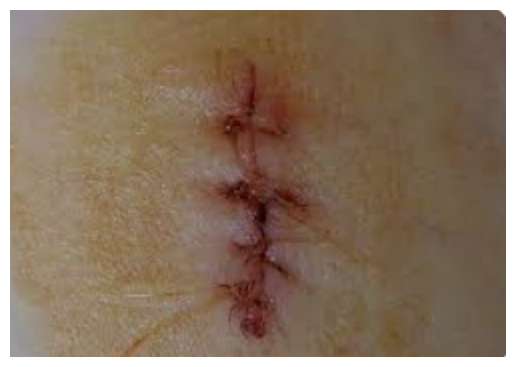


Predicted Wound Stage: Hemostasis
Hemostasis: 65.44%
Inflammatory: 4.99%
Proliferative: 29.40%
Maturation: 0.16%

Do you want to analyze another image? (y/n): y


Saving wound4.png to wound4 (1).png


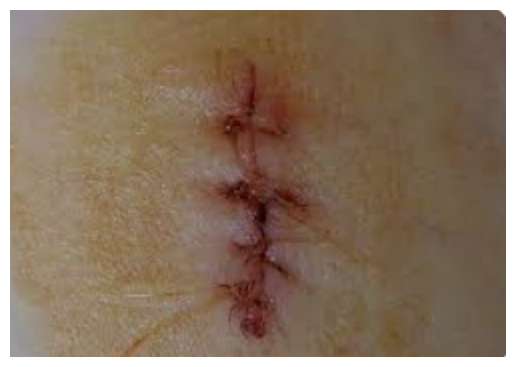


Predicted Wound Stage: Hemostasis
Hemostasis: 65.44%
Inflammatory: 4.99%
Proliferative: 29.40%
Maturation: 0.16%

Do you want to analyze another image? (y/n): n
Exiting the program.


In [ ]:
# Step 4: Upload and Preprocess the Image
def upload_and_preprocess_image():
    uploaded = files.upload()
    for img_name in uploaded.keys():
        img = Image.open(img_name).convert("RGB")
        inputs = processor(text=["Hemostasis", "Inflammatory", "Proliferative", "Maturation"], images=img, return_tensors="pt", padding=True)
        return inputs, img_name

# Step 5: Display the Image
def display_image(img_name):
    img = Image.open(img_name)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Step 6: Predict the Wound Stage
def predict_wound_stage(inputs):
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image
    probs = logits_per_image.softmax(dim=1)  # Convert logits to probabilities
    return probs

# Step 7: Main Function to Run the Entire Process
def main():
    while True:
        inputs, img_name = upload_and_preprocess_image()
        display_image(img_name)
        probs = predict_wound_stage(inputs)

        stages = ["Hemostasis", "Inflammatory", "Proliferative", "Maturation"]
        predicted_stage = stages[probs.argmax()]

        print("\nPredicted Wound Stage:", predicted_stage)
        for i, stage in enumerate(stages):
            print(f"{stage}: {probs[0][i]*100:.2f}%")

        # Ask the user if they want to continue
        cont = input("\nDo you want to analyze another image? (y/n): ").strip().lower()
        if cont != 'y':
            print("Exiting the program.")
            break

# Run the Main Function
main()

In [ ]:
# Step 1: Install Required Libraries
!pip install torch torchvision transformers pillow

In [ ]:
# Step 2: Import Libraries
import torch
from PIL import Image
from transformers import CLIPProcessor, CLIPModel
from google.colab import files
import matplotlib.pyplot as plt

# Load the CLIP Model and Processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [ ]:
# Step 4: Upload and Preprocess the Image
def upload_and_preprocess_image():
    uploaded = files.upload()
    for img_name in uploaded.keys():
        img = Image.open(img_name).convert("RGB")
        inputs = processor(text=[
            "An open wound with fresh bleeding and visible blood clots, minimal swelling, and pale or slightly red surrounding skin.",  # Hemostasis
            "A wound with redness, warmth, and swelling around the area, with fluid discharge, and the edges are slightly raised, indicating an active inflammatory response.",  # Inflammatory
            "A wound with pink or red granulation tissue, reduced redness and swelling, new skin growth at the edges, and minimal or no fluid discharge, showing signs of healing.",  # Proliferative
            "A fully or mostly closed wound with scar tissue, no redness or swelling, and the surrounding skin may be slightly tight, indicating the final stage of healing."  # Maturation
        ], images=img, return_tensors="pt", padding=True)
        return inputs, img_name

# Step 5: Display the Image
def display_image(img_name):
    img = Image.open(img_name)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Step 6: Predict the Wound Stage
def predict_wound_stage(inputs):
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image
    probs = logits_per_image.softmax(dim=1)  # Convert logits to probabilities
    return probs

# Step 7: Main Function to Run the Entire Process
def main():
    while True:
        inputs, img_name = upload_and_preprocess_image()
        display_image(img_name)
        probs = predict_wound_stage(inputs)

        stages = [
            "Hemostasis: Fresh bleeding and clot formation.",
            "Inflammatory: Redness, swelling, and possible infection.",
            "Proliferative: Granulation tissue formation and healing.",
            "Maturation: Scar tissue forming and wound closing."
        ]
        predicted_stage = stages[probs.argmax()]

        print("\nPredicted Wound Stage:", predicted_stage)
        for i, stage in enumerate(stages):
            print(f"{stage}: {probs[0][i]*100:.2f}%")

        # Ask the user if they want to continue
        cont = input("\nDo you want to analyze another image? (y/n): ").strip().lower()
        if cont != 'y':
            print("Exiting the program.")
            break

# Run the Main Function
main()

In [ ]:
# Step 4: Upload and Preprocess the Image
def upload_and_preprocess_image():
    uploaded = files.upload()
    for img_name in uploaded.keys():
        img = Image.open(img_name).convert("RGB")
        inputs = processor(text=[
            "An open wound with fresh bleeding and visible blood clots, minimal swelling, and pale or slightly red surrounding skin.",  # Hemostasis
            "A wound with redness, warmth, and swelling around the area, with fluid discharge, and the edges are slightly raised, indicating an active inflammatory response.",  # Inflammatory
            "A wound with pink or red granulation tissue, reduced redness and swelling, new skin growth at the edges, and minimal or no fluid discharge, showing signs of healing.",  # Proliferative
            "A fully or mostly closed wound with scar tissue, no redness or swelling, and the surrounding skin may be slightly tight, indicating the final stage of healing.",  # Maturation
            "No visible wound, healthy skin with no signs of injury or damage."  # No Wound
        ], images=img, return_tensors="pt", padding=True)
        return inputs, img_name

# Step 5: Display the Image
def display_image(img_name):
    img = Image.open(img_name)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Step 6: Predict the Wound Stage
def predict_wound_stage(inputs):
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image
    probs = logits_per_image.softmax(dim=1)  # Convert logits to probabilities
    return probs

# Step 7: Main Function to Run the Entire Process
def main():
    while True:
        inputs, img_name = upload_and_preprocess_image()
        display_image(img_name)
        probs = predict_wound_stage(inputs)

        stages = [
            "Hemostasis: Fresh bleeding and clot formation.",
            "Inflammatory: Redness, swelling, and possible infection.",
            "Proliferative: Granulation tissue formation and healing.",
            "Maturation: Scar tissue forming and wound closing.",
            "No Wound: Healthy skin with no signs of injury or damage."
        ]
        predicted_stage = stages[probs.argmax()]

        print("\nPredicted Wound Stage:", predicted_stage)
        for i, stage in enumerate(stages):
            print(f"{stage}: {probs[0][i]*100:.2f}%")

        # Ask the user if they want to continue
        cont = input("\nDo you want to analyze another image? (y/n): ").strip().lower()
        if cont != 'y':
            print("Exiting the program.")
            break

# Run the Main Function
main()